In [1]:
import numpy as np
import dask.array as da
from lamade.array.core.matrix_ops import sym_mat_mult
from lamade.array.core.random import array_constant_partition
import matplotlib.pyplot as plt

In [14]:
m, n, k = (10000, 40000, 10)
a = da.random.random(size=(m,n))
x = da.random.random(size=(n,k))

In [15]:
a

dask.array<random_sample, shape=(10000, 40000), dtype=float64, chunksize=(2500, 4000), chunktype=numpy.ndarray>

In [16]:
p_values = np.linspace(1, 0.01, 20)
run_times = []
for p in p_values:
    _, log = sym_mat_mult(a, x, log=10, p=p, compute = True)
    run_times.append(log['end']-log['start'])

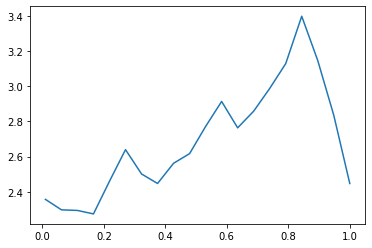

In [17]:
plt.plot(p_values, run_times)

In [18]:
_, log = sym_mat_mult(a, x, p=.1, compute=True, log=10)
log

{'array_split': {'start': 1580242630.348233,
  'params': {'axis': 1, 'seed': 42, 'log': 8},
  'end': 1580242630.349531},
 'wrapped_f': {'dot': [{'start': 1580242630.350234, 'end': 1580242631.578479}],
  'T.dot': [{'start': 1580242631.5784802, 'end': 1580242632.627209}],
  'start': 1580242630.350176,
  'params': {'p': 1, 'seed': 42, 'compute': True, 'log': 8},
  'end': 1580242632.627219},
 'start': 1580242630.348078,
 'params': {'p': 0.1, 'seed': 42, 'compute': True, 'log': 10},
 'end': 1580242632.6330082}

In [28]:
p_values = np.linspace(.49, 0.01, 20)
run_times = []
for p in p_values:
    parts = array_constant_partition(a.shape, p=.1)
    _, log = sym_mat_mult(a, x, log=10, p=parts[0], compute = True)
    run_times.append(log['end']-log['start'])
    
p_values = np.hstack([1, p_values])
_, log = sym_mat_mult(a, x, log=10, p=1, compute = True)
run_times.insert(0, log['end']-log['start'])

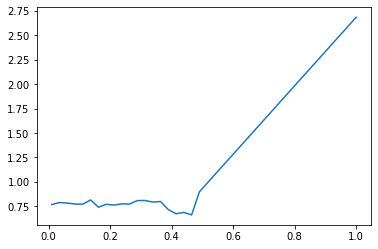

In [29]:
plt.plot(p_values, run_times)

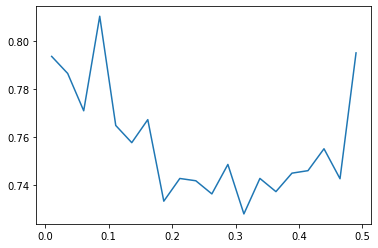

In [20]:
plt.plot(p_values, run_times)

In [24]:
np.hstack([p_values, 1])

array([0.49      , 0.46473684, 0.43947368, 0.41421053, 0.38894737,
       0.36368421, 0.33842105, 0.31315789, 0.28789474, 0.26263158,
       0.23736842, 0.21210526, 0.18684211, 0.16157895, 0.13631579,
       0.11105263, 0.08578947, 0.06052632, 0.03526316, 0.01      ,
       1.        ])

In [28]:
# Axis 1 Testing
for p in [.001, .1, .2, .5]:
    a_test = np.random.rand(1000, 1000)
    parts = array_constant_partition(a_test.shape, p=.1)
    a_copy = np.zeros_like(a_test)
    for part in parts:
        a_copy[part, :] = a_test[part, :]
    np.testing.assert_almost_equal(a_copy, a_test)

In [29]:
# Axis 2 Testing
for p in [.001, .1, .2, .5]:
    a_test = np.random.rand(1000, 1000)
    parts = array_constant_partition(a_test.shape, p=.1, axis=2)
    a_copy = np.zeros_like(a_test)
    for part in parts:
        a_copy[:, part] = a_test[:, part]
    np.testing.assert_almost_equal(a_copy, a_test)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])